In [2]:
import pandas as pd

# Read in your files
csv1 = pd.read_csv('all_mice_GSE64398.csv') 
csv2 = pd.read_csv('same_mouse_human_gene_mapping.csv')
csv3 = pd.read_csv('all_mice_GSE64398_metadata.csv')  # must have 'Accession', 'Age_weeks', 'AD'

# Step 1: Row filtering & reordering as before
csv1['ID_REF'] = csv1['ID_REF'].astype(str)
csv2['gene_id_mouse'] = csv2['gene_id_mouse'].astype(str)
ordered_genes = csv2['gene_id_mouse'].tolist()
csv1_filtered = csv1[csv1['ID_REF'].isin(ordered_genes)]
csv1_filtered = csv1_filtered.set_index('ID_REF')
csv1_matched_order = csv1_filtered.reindex(ordered_genes).reset_index()

# Step 2: Map age & AD for each sample column
# Make sure Accession is string and matches columns
csv3['Accession'] = csv3['Accession'].astype(str)
age_dict = dict(zip(csv3['Accession'], csv3['Age_weeks']))
ad_dict  = dict(zip(csv3['Accession'], csv3['AD']))

# For all columns that start with GSM (samples), build age and AD rows
sample_cols = [col for col in csv1_matched_order.columns if col.startswith('GSM')]

age_row = ['age'] + [age_dict.get(col, '') for col in sample_cols]
ad_row  = ['AD']  + [ad_dict.get(col, '')  for col in sample_cols]

# Append the rows to the DataFrame
df_plus_rows = pd.concat([
    csv1_matched_order,
    pd.DataFrame([age_row, ad_row], columns=csv1_matched_order.columns)
], ignore_index=True)

# Save to file
# df_plus_rows.to_csv('csv1_reordered_with_age_AD.tsv', sep='\t', index=False)

# Preview the result
print(df_plus_rows.tail(5))

      ID_REF GSM1570253 GSM1570254 GSM1570255 GSM1570256 GSM1570257  \
9630  ZYG11B    6.93133    7.13554    6.99881    6.92082    6.81639   
9631     ZYX    12.1803    12.4074    12.2972    12.1735    12.3489   
9632    ZZZ3    6.55961    6.58151    6.71003    6.71477    6.62435   
9633     age         32         16         32         16         72   
9634      AD         no         no         no        yes         no   

     GSM1570258 GSM1570259 GSM1570260 GSM1570261  ... GSM1570576 GSM1570577  \
9630    6.41424    7.05888     6.9318      6.808  ...    6.85327    6.84665   
9631    11.9116     12.059    12.1774    12.2862  ...     11.622    11.9337   
9632    6.64601    6.66812    6.57711    6.58633  ...     6.7401    6.57661   
9633         16          8          8         72  ...         72         72   
9634        yes         no        yes         no  ...        yes        yes   

     GSM1570578 GSM1570579 GSM1570580 GSM1570581 GSM1570582 GSM1570583  \
9630    6.96314    6.985

In [1]:
import pandas as pd

# Read in your files
csv1 = pd.read_csv('all_human_GSE33000.csv') 
csv2 = pd.read_csv('same_mouse_human_gene_mapping.csv')
csv3 = pd.read_csv('all_human_GSE33000_metadata.csv')  # must have 'Accession', 'Age_weeks', 'AD'

# Step 1: Row filtering & reordering as before
csv1['ID_REF'] = csv1['ID_REF'].astype(str)
csv2['gene_id_human'] = csv2['gene_id_human'].astype(str)
ordered_genes = csv2['gene_id_human'].tolist()
csv1_filtered = csv1[csv1['ID_REF'].isin(ordered_genes)]
csv1_filtered = csv1_filtered.set_index('ID_REF')
csv1_matched_order = csv1_filtered.reindex(ordered_genes).reset_index()

# Step 2: Map age & AD for each sample column
# Make sure Accession is string and matches columns
csv3['Accession'] = csv3['Accession'].astype(str)
age_dict = dict(zip(csv3['Accession'], csv3['Age']))
ad_dict  = dict(zip(csv3['Accession'], csv3['AD']))

# For all columns that start with GSM (samples), build age and AD rows
sample_cols = [col for col in csv1_matched_order.columns if col.startswith('GSM')]

age_row = ['Age'] + [age_dict.get(col, '') for col in sample_cols]
ad_row  = ['AD']  + [ad_dict.get(col, '')  for col in sample_cols]

# Append the rows to the DataFrame
df_plus_rows = pd.concat([
    csv1_matched_order,
    pd.DataFrame([age_row, ad_row], columns=csv1_matched_order.columns)
], ignore_index=True)

# Save to file
# df_plus_rows.to_csv('csv1_reordered_with_age_AD.tsv', sep='\t', index=False)

# Preview the result
print(df_plus_rows.tail(5))

           ID_REF GSM1423780 GSM1423781 GSM1423782 GSM1423783 GSM1423784  \
9630  10023830425   0.080426  -0.027666   0.085496  -0.109619    0.10504   
9631  10023815205   0.007106   0.065091   0.040479   0.079794  -0.013048   
9632  10025912610   0.063151  -0.118265  -0.027519  -0.250529    0.05136   
9633          Age         67         88         62         90         90   
9634           AD        yes        yes        yes        yes        yes   

     GSM1423785 GSM1423786 GSM1423787 GSM1423788  ... GSM1424237 GSM1424238  \
9630  -0.100777   0.017847  -0.204545  -0.042049  ...  -0.145379   -0.07866   
9631   0.078262   -0.04752   0.058175   0.002121  ...   0.106946   0.109338   
9632   0.089817    0.23913   0.072385  -0.058781  ...  -0.070367  -0.058349   
9633         95         77        100         72  ...         50         72   
9634        yes        yes        yes        yes  ...         no         no   

     GSM1424239 GSM1424240 GSM1424241 GSM1424242 GSM1424243 GSM14242

In [16]:
print(df_plus_rows['GSM1423780'])

0      -0.011784
1      -0.037571
2        0.05633
3        0.04607
4       0.023455
          ...   
9630    0.080426
9631    0.007106
9632    0.063151
9633          67
9634         yes
Name: GSM1423780, Length: 9635, dtype: object


In [2]:
import pandas as pd
import numpy as np

# df: original DataFrame (rows = features + metadata, columns = patients)

GENE_ROWS = slice(0, 9633)      # Python slice end is exclusive; row 0..9632
AGE_ROW = 9633
LABEL_ROW = 9634

df = df_plus_rows.copy()

# 1. Split components
gene_expr = df.iloc[GENE_ROWS, :].copy()
age_series = df.iloc[AGE_ROW, :].copy()
label_series = df.iloc[LABEL_ROW, :].copy()

# 2. Ensure numeric gene expression
# Coerce all to numeric; invalid parse becomes NaN
gene_expr = gene_expr.apply(pd.to_numeric, errors='coerce')

# 3. Build a new DataFrame with samples as rows
# Transpose gene expression so rows = patients
X_genes = gene_expr.T  # shape: n_patients x n_genes
X_genes.columns = [f'gene_{i}' for i in range(X_genes.shape[1])]

# Add age
age = pd.to_numeric(age_series, errors='coerce')
X_genes['age'] = age

# Labels: map yes/no (adjust mapping if your dataset uses different terms)
y = label_series.str.strip().str.lower().map({'yes': 1, 'no': 0})

# Combine
data = X_genes.copy()
data['AD'] = y

# Drop samples with missing label or age
data = data.dropna(subset=['AD', 'age'])

print(data.shape)        # (n_patients, n_genes + 2)
print(data['AD'].value_counts())

(467, 9635)
AD
1.0    310
0.0    157
Name: count, dtype: int64


In [3]:
# Drop genes with >20% missing values
threshold = 0.2 * data.shape[0]
cols_to_keep = [c for c in data.columns if c.startswith('gene_') and data[c].isna().sum() <= threshold]
cols_to_keep += ['age', 'AD']
data = data[cols_to_keep]

# Simple imputation
from sklearn.impute import SimpleImputer
features = [c for c in data.columns if c not in ('AD')]
imputer = SimpleImputer(strategy='median')
data[features] = imputer.fit_transform(data[features])

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['AD'])
y = data['AD']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

pipeline = Pipeline([
    ('var', VarianceThreshold(threshold=0.0)),  # remove zero-variance genes
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty='l1', solver='saga', max_iter=5000, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

var_selector = pipeline.named_steps['var']
mask = var_selector.get_support()  # Boolean mask, True for kept columns

# X_train must be a DataFrame to keep gene names. Get the kept column names:
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns[mask]
else:
    # If X_train is an array, just use index numbers
    feature_names = np.arange(X_train.shape[1])[mask]

# 3. Get the learned coefficients from the classifier step
clf = pipeline.named_steps['clf']
coefs = clf.coef_.ravel()  # Shape: [n_features_passing_var]

# 4. Find the top N |w| weights and associated genes
N = 100  # or any number you want
abs_weights = np.abs(coefs)
top_indices = np.argsort(abs_weights)[-N:][::-1]  # Indices of top |w| features

top_genes = feature_names[top_indices]
top_weights = coefs[top_indices]

# 5. Print top genes and their weights
for gene, weight in zip(top_genes, top_weights):
    print(f"{gene}\t{weight:.4f}")

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87        39
         1.0       0.96      0.90      0.93        78

    accuracy                           0.91       117
   macro avg       0.89      0.91      0.90       117
weighted avg       0.91      0.91      0.91       117

ROC AUC: 0.9743589743589743
gene_5623	-0.2937
gene_7014	0.1871
gene_5764	0.1827
gene_5347	0.1761
gene_4070	-0.1600
age	0.1558
gene_7679	0.1412
gene_7229	-0.1328
gene_5984	0.1271
gene_5596	0.1201
gene_4296	-0.1153
gene_8829	0.1124
gene_6404	0.1120
gene_6411	0.1103
gene_5195	-0.1103
gene_770	0.1095
gene_7802	0.1082
gene_417	-0.1065
gene_943	0.1060
gene_4201	-0.1043
gene_7766	0.1039
gene_8307	-0.1029
gene_3894	0.1021
gene_7430	-0.1016
gene_555	0.1015
gene_1307	0.1007
gene_8635	0.0957
gene_2332	-0.0929
gene_2643	0.0926
gene_6546	0.0923
gene_3248	0.0913
gene_7290	0.0908
gene_5039	-0.0896
gene_2768	0.0895
gene_8404	-0.0889
gene_9403	0.0879
gene_3182	-0.0855
gene_4701	-0.

Confusion Matrix:
 [[36  3]
 [ 8 70]]


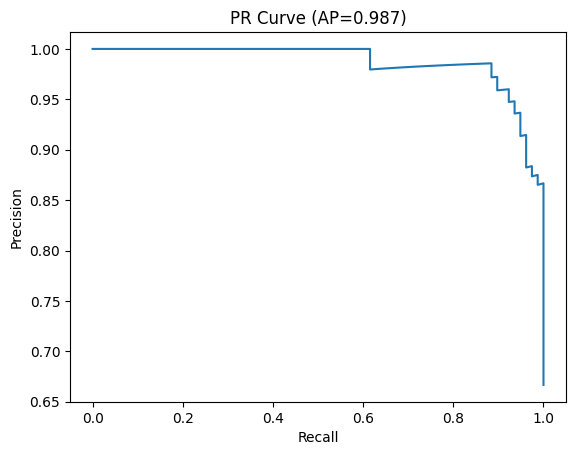

Bootstrapped ROC AUC mean=0.973, 95% CI=(0.944, 0.994)


In [31]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test, y_pred, y_proba already defined
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
plt.figure()
plt.plot(recall, precision)
plt.title(f'PR Curve (AP={ap:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Bootstrapped AUC
rng = np.random.default_rng(42)
n_boot = 1000
auc_boot = []
for _ in range(n_boot):
    idx = rng.integers(0, len(y_test), len(y_test))
    auc_boot.append(roc_auc_score(y_test.iloc[idx], y_proba[idx]))
auc_boot = np.array(auc_boot)
ci_lower, ci_upper = np.percentile(auc_boot, [2.5, 97.5])
print(f"Bootstrapped ROC AUC mean={auc_boot.mean():.3f}, 95% CI=({ci_lower:.3f}, {ci_upper:.3f})")

In [ ]:
from sklearn.model_selection import StratifiedKFold
from collections import Counter

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
selected_counter = Counter()

for train_idx, test_idx in cv.split(X, y):
    pipeline.fit(X.iloc[train_idx], y.iloc[train_idx])
    clf = pipeline.named_steps['clf']
    # Assuming logistic with L1
    coefs = clf.coef_[0]
    feature_mask = pipeline.named_steps['var'].get_support()
    feature_names = X.columns[feature_mask]
    nonzero = [feature_names[i] for i, w in enumerate(coefs) if w != 0]
    selected_counter.update(nonzero)

print("Top recurring features:")
for feat, freq in selected_counter.most_common(20):
    print(f"{feat}: in {freq} folds")

In [7]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

pipeline = Pipeline([
    ('var', VarianceThreshold(threshold=0.0)),  # remove zero-variance genes
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty='l1', solver='saga', max_iter=5000, class_weight='balanced'))
])

X_no_age = X.drop(columns=['age'])
cv_auc_no_age = cross_val_score(pipeline, X_no_age, y, cv=5, scoring='roc_auc')
print("CV AUC without age:", cv_auc_no_age.mean())

C:\Users\Adi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


CV AUC without age: 0.9669745057232049


C:\Users\Adi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


still high, even without age => age is not decisive

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(pipeline, X.drop(columns=['age']), y, cv=rskf, scoring='roc_auc')
print(f"Mean AUC={scores.mean():.3f} +/- {scores.std():.3f}")

C:\Users\Adi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif


inner_params = {
    'clf__penalty': ['l1', 'elasticnet'],
    'clf__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],  # only used for elasticnet
    'clf__C': [0.1, 0.5, 1, 2, 5]
}

# Adjust pipeline: ensure clf allows elasticnet
pipeline_nested = Pipeline([
    ('var', VarianceThreshold()),
    ('kbest', SelectKBest(f_classif, k=500)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='saga', max_iter=5000, class_weight='balanced'))
])

inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid = GridSearchCV(pipeline_nested, inner_params, scoring='roc_auc', cv=inner_cv, n_jobs=-1)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
outer_scores = []

for tr, te in outer_cv.split(X, y):
    grid.fit(X.iloc[tr], y.iloc[tr])
    best_model = grid.best_estimator_
    proba = best_model.predict_proba(X.iloc[te])[:,1]
    outer_scores.append(roc_auc_score(y.iloc[te], proba))

print(f"Nested CV AUC={np.mean(outer_scores):.3f} +/- {np.std(outer_scores):.3f}")